In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
class DataGeneration:
    
    # target_position = 0 (첫번째열이 정답데이터), target_position=-1 (마지막열이 정답데이터)
    def __init__(self, name, file_path, seperation_rate, target_position=-1):
        
        self.name = name
        
        self.file_path = file_path
        
        self.seperation_rate = seperation_rate
        
        if (target_position == -1  or  target_position == 0):      
            self.target_position = target_position
        
        else:
            err_str = 'target_position must be -1 or 0'            
            raise Exception(err_str)    
            
    
    # print data target distribution 
    # str_of_kind : 'original data' or  'training data'  or  'test data'
    def __display_target_distribution(self, data, str_of_kind='original data'):
        
        print('=======================================================================================================')
        
        target_data = data[ :, self.target_position ]
        
        # numpy.unique() 사용하여 loaded data target 분포 확인
        unique, counts = np.unique(target_data, return_counts=True)

        unique_target = []
    
        for index in range(len(unique)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique[index], ', count = ', counts[index])
        
            unique_target.append(unique[index])

        for index in range(len(unique_target)):
        
            print('[DataGeneration] unique number of ' + str_of_kind + ' = ', unique_target[index], ', ratio = ', np.round(100 * counts[index] / (target_data.shape[0]), 2), ' %')
    
        print('=======================================================================================================')
        
        
    # numpy.random.shuffle()  이용하여 training_data / test_data 생성
    def generate(self):
    
        # 데이터 불러오기, 파일이 없는 경우 exception 발생

        try:
            loaded_data = np.loadtxt(self.file_path, delimiter=',', dtype=np.float32)
            
        except Exception as err:
            print('[DataGeneration::generate()]  ', str(err))
            raise Exception(str(err))

        print("[DataGeneration]  loaded_data.shape = ", loaded_data.shape)
            
        # print the target distribution of original data 
        
        self.__display_target_distribution(loaded_data, 'original data')
        
        
        # 분리비율에 맞게 테스트데이터로 분리
        total_data_num = len(loaded_data)
        test_data_num = int(len(loaded_data) * self.seperation_rate)

        # numpy.random.shuffle 을 이용하여 랜덤하게 데이터 섞기
        np.random.shuffle(loaded_data)
        
        # test_data 는 0 : test_data_num
        
        
        test_data = loaded_data[ 0:test_data_num ]

        # training_data 는 test_data_num 부터 끝까지 
        training_data = loaded_data[ test_data_num: ]

        # display target distribution of generated data 
        
        self.__display_target_distribution(training_data, 'training data')
        
        self.__display_target_distribution(test_data, 'test data')
        
        return training_data, test_data

In [3]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes
        
        # 은닉층 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W2 = np.random.randn(self.input_nodes, self.hidden_nodes) / np.sqrt(self.input_nodes/2)
        self.b2 = np.random.rand(self.hidden_nodes)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes, self.output_nodes) / np.sqrt(self.hidden_nodes/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z2 = np.zeros([1,hidden_nodes])
        self.A2 = np.zeros([1,hidden_nodes])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 계산    
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = sigmoid(self.Z2)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
   
    
    # 정확도 측정함수 
    def accuracy(self, test_input_data, test_target_data):
        
        
        matched_list = []
        not_matched_list = []
        index_label_prediction_list = []
        
        
        for index in range(len(test_input_data)):
                        
            label = int(test_target_data[index])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_input_data[index] / 255.0 * 0.99) + 0.01
                  
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
        
            if label == predicted_num:
                matched_list.append(index)
                
            else:
                
                not_matched_list.append(index)
                
                not_matched_target_data = label

                not_matched_data_index = index
    
                not_matched_predicted_num = predicted_num
               
                index_label_prediction = (not_matched_data_index, not_matched_target_data, not_matched_predicted_num)
                
                index_label_prediction_list.append(index_label_prediction)
        #print("Current Accuracy = ", (len(matched_list)/(len(test_input_data))) )
        
        accuracy_val = (len(matched_list)/(len(test_input_data)))
        
        
        return accuracy_val, index_label_prediction_list, not_matched_list
    
    
    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_3 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A2.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3  
        
        # 은닉층 loss 인 loss_2 구함        
        loss_2 = np.dot(loss_3, self.W3.T) * self.A2 * (1-self.A2)
        
        # 은닉층 가중치 W2, 은닉층 바이어스 b2 업데이트
        self.W2 = self.W2 - self.learning_rate * np.dot(self.A1.T, loss_2)   
        
        self.b2 = self.b2 - self.learning_rate * loss_2
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z2 = np.dot(input_data, self.W2) + self.b2
        A2 = sigmoid(Z2)
        
        Z3 = np.dot(A2, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

In [4]:
# DataGeneration class 이용하여 training data , validation data 생성
seperation_rate = 0.35  # training data 10 % 비율로 validation data 생성
target_position = 0    # 정답은 첫번째 열

try:
    data_obj = DataGeneration('MNIST', '../mnist_train.csv', seperation_rate, target_position)

    (training_data, validation_data) = data_obj.generate()
    
    print("training_data.shape = ", training_data.shape)
    print("validation_data.shape = ", validation_data.shape)

except Exception as err:
    print('Exception Occur !!')
    print(str(err))

[DataGeneration]  loaded_data.shape =  (60000, 785)
[DataGeneration] unique number of original data =  0.0 , count =  5923
[DataGeneration] unique number of original data =  1.0 , count =  6742
[DataGeneration] unique number of original data =  2.0 , count =  5958
[DataGeneration] unique number of original data =  3.0 , count =  6131
[DataGeneration] unique number of original data =  4.0 , count =  5842
[DataGeneration] unique number of original data =  5.0 , count =  5421
[DataGeneration] unique number of original data =  6.0 , count =  5918
[DataGeneration] unique number of original data =  7.0 , count =  6265
[DataGeneration] unique number of original data =  8.0 , count =  5851
[DataGeneration] unique number of original data =  9.0 , count =  5949
[DataGeneration] unique number of original data =  0.0 , ratio =  9.87  %
[DataGeneration] unique number of original data =  1.0 , ratio =  11.24  %
[DataGeneration] unique number of original data =  2.0 , ratio =  9.93  %
[DataGeneration

In [7]:
# hyper-parameter
i_nodes = training_data.shape[1] - 1    # input nodes 개수
h1_nodes = 100     # hidden 1 nodes
o_nodes = 10       # output nodes
lr = 0.1           # learning rate
epochs = 1         # epochs

# 손실함수 값을 저장할 list 생성. 
loss_val_list = []

# 정확도 저장 리스트
training_accuracy_list = []
validation_accuracy_list = []

# 객체 생성
nn = NeuralNetwork(i_nodes, h1_nodes, o_nodes, lr)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
        
        # input_data, target_data normalize        
        target_data = np.zeros(o_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 1000 == 0:
            print("epochs = ", i+1, ", step = ", step,  ", current loss_val = ", nn.loss_val())
            
        # 손실함수 값 저장 per step
        loss_val_list.append(nn.loss_val())    
        
    # 정확도 계산 및 저장 per epochs
    training_accuracy = nn.accuracy(training_data[:, 1:], training_data[:, 0])[0]
    validation_accuracy = nn.accuracy(validation_data[:, 1:], validation_data[:, 0])[0]
        
    training_accuracy_list.append(training_accuracy)
    validation_accuracy_list.append(validation_accuracy)
        
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

epochs =  1 , step =  0 , current loss_val =  6.679149775846546
epochs =  1 , step =  1000 , current loss_val =  1.7813415109101975
epochs =  1 , step =  2000 , current loss_val =  2.999819251419482
epochs =  1 , step =  3000 , current loss_val =  0.7399836070400096
epochs =  1 , step =  4000 , current loss_val =  1.2012202862106833
epochs =  1 , step =  5000 , current loss_val =  0.9883451543836191
epochs =  1 , step =  6000 , current loss_val =  0.8598407169576622
epochs =  1 , step =  7000 , current loss_val =  0.7008210907625735
epochs =  1 , step =  8000 , current loss_val =  1.2984665482767528
epochs =  1 , step =  9000 , current loss_val =  1.2291983388569656
epochs =  1 , step =  10000 , current loss_val =  0.753136931561844
epochs =  1 , step =  11000 , current loss_val =  0.8433269961084875
epochs =  1 , step =  12000 , current loss_val =  0.8830928637154635
epochs =  1 , step =  13000 , current loss_val =  0.8966507714920542
epochs =  1 , step =  14000 , current loss_val =  

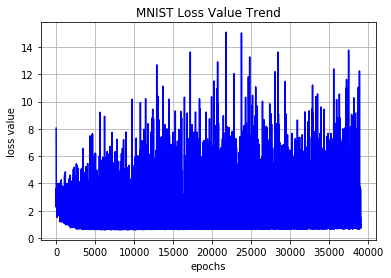

In [6]:
# 손실함수 추세 확인
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('epochs')
plt.ylabel('loss value')
plt.grid()
plt.plot(loss_val_list, color='b')
plt.show()

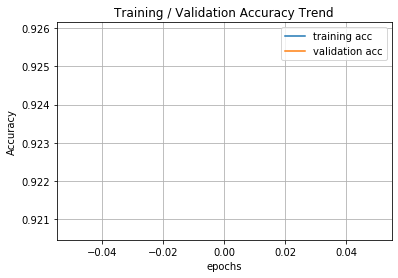

In [8]:
# 과적합 추세 확인

plt.title('Training / Validation Accuracy Trend')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.plot(training_accuracy_list, label='training acc')
plt.plot(validation_accuracy_list, label='validation acc')
plt.legend(loc='best')

plt.show()

In [8]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴

try:
    
    test_data = np.loadtxt('../mnist_test.csv', delimiter=',', dtype=np.float32)

    test_input_data = test_data[ : , 1: ]
    test_target_data = test_data[ : , 0 ]

    print("test_data.shape = ", test_data.shape)
    print("test_data[0,0] = ", test_data[0,0], ", len(test_data[0]) = ", len(test_data[0]))

    # measure accuracy
    (accuracy_ret, index_label_prediction_list, not_matched_list) = nn.accuracy(test_input_data, test_target_data)   

    print('Accuracy = ', np.round(100*accuracy_ret, 3), ' %')
    
except Exception as err:
    
    print('Exception occur !!')
    print(str(err))

test_data.shape =  (10000, 785)
test_data[0,0] =  7.0 , len(test_data[0]) =  785
Accuracy =  92.76  %


In [9]:
print(not_matched_list)

[8, 77, 92, 124, 149, 151, 185, 193, 195, 217, 241, 243, 245, 247, 259, 290, 300, 313, 320, 321, 336, 340, 341, 352, 359, 362, 381, 403, 435, 444, 445, 448, 449, 464, 468, 479, 495, 502, 507, 530, 531, 542, 543, 551, 565, 569, 578, 582, 591, 605, 619, 627, 628, 629, 658, 659, 684, 689, 691, 707, 717, 720, 728, 740, 741, 760, 781, 791, 800, 839, 844, 881, 882, 890, 898, 900, 906, 924, 938, 939, 947, 950, 956, 959, 960, 965, 982, 992, 1012, 1014, 1039, 1044, 1050, 1062, 1068, 1101, 1107, 1112, 1114, 1119, 1124, 1153, 1173, 1181, 1191, 1192, 1194, 1198, 1200, 1202, 1204, 1206, 1208, 1226, 1228, 1232, 1234, 1242, 1247, 1248, 1256, 1260, 1282, 1283, 1289, 1291, 1299, 1315, 1319, 1325, 1326, 1328, 1345, 1410, 1425, 1429, 1433, 1444, 1469, 1494, 1500, 1514, 1522, 1525, 1527, 1530, 1549, 1553, 1559, 1569, 1581, 1596, 1609, 1634, 1640, 1678, 1681, 1686, 1696, 1709, 1717, 1718, 1722, 1732, 1751, 1754, 1759, 1765, 1772, 1790, 1800, 1813, 1823, 1828, 1850, 1857, 1868, 1878, 1880, 1901, 1903, 1917,

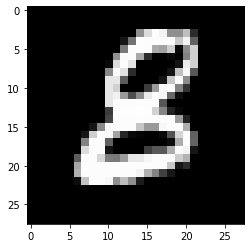

label =  8
prediction =  5


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

<Figure size 432x288 with 0 Axes>

In [17]:
# check false data
import matplotlib.pyplot as plt
import random
%matplotlib inline

false_data = random.choice(index_label_prediction_list)

img = test_input_data[false_data[0]].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

index = false_data[0]

target = false_data[1]

input_data = test_input_data[index, 1:]

predicted_num = false_data[2]

title_str = "index: {}, label : {}, prediction : {}".format(index, target, predicted_num)

print('label = ', target)
print('prediction = ', predicted_num)

plt.colorbar()
plt.title(title_str)

In [19]:
max_loss = np.max(loss_val_list)
min_loss = np.min(loss_val_list)
max_loss_index = np.argmax(loss_val_list)
min_loss_index = np.argmin(loss_val_list)

print("max_loss = ", max_loss, ", max_loss_index = ", max_loss_index, ", min_loss = ", min_loss, ", min_loss_index = ", min_loss_index)

epochs_num = int(max_loss_index/len(training_data))  # 
print('epochs_num = ', epochs_num)

if max_loss_index > len(training_data):
    real_max_loss_index = max_loss_index-epochs_num*len(training_data)
else:
    real_max_loss_index = max_loss_index
    

if min_loss_index > len(training_data):
    real_min_loss_index = min_loss_index-epochs_num*len(training_data)
else:
    real_min_loss_index = min_loss_index
    


print('real_max_index = ', real_max_loss_index, ', real_min_index = ', real_min_loss_index)  # real_min_loss_index 다시 계산

max_loss =  14.647563607883026 , max_loss_index =  28910 , min_loss =  0.5820441685912864 , min_loss_index =  8495
epochs_num =  0
real_max_index =  28910 , real_min_index =  8495


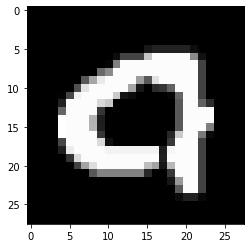

label =  4
prediction =  0


In [20]:
# check max loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_max_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_max_loss_index, 0])

input_data = (training_data[real_max_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)

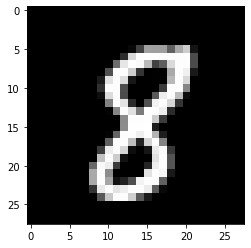

label =  8
prediction =  8


In [21]:
# check min loss data
import matplotlib.pyplot as plt
%matplotlib inline

img = training_data[real_min_loss_index, 1:].reshape(28,28)

plt.imshow(img, cmap='gray')
plt.show()

target = int(training_data[real_min_loss_index, 0])

input_data = (training_data[real_min_loss_index, 1:] / 255.0 * 0.99) + 0.01

predicted_num = nn.predict(np.array(input_data, ndmin=2))

print('label = ', target)
print('prediction = ', predicted_num)